<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 


link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
134,Dead,2,Mr. Emile Richard,male,23.0,0,0,15.0458
128,Dead,3,Mr. Johan Ekstrom,male,45.0,0,0,6.9750
835,Survived,1,Mr. Pierre Marechal,male,29.0,0,0,29.7000
821,Dead,3,Mr. John Flynn,male,36.0,0,0,6.9500
203,Survived,3,Mr. Gurshon Cohen,male,18.0,0,0,8.0500


# Data preparation

In [ ]:
#change order columns

df_titanic = df_titanic[["Name", "Sex", "Age", "Fare", "Survived","Pclass","Siblings/Spouses Aboard", "Parents/Children Aboard"]]
df_titanic.sample(5)

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
744,Mr. Daniel Warner Marvin,male,19.0,53.1000,Dead,1,1,0
487,Mr. Konrad Mathias Reiersen Hagland,male,19.0,19.9667,Dead,3,1,0
512,Mr. William Anderson Walker,male,47.0,34.0208,Dead,1,0,0
886,Mr. Patrick Dooley,male,32.0,7.7500,Dead,3,0,0
76,Mr. Rahamin Haim Moutal,male,28.0,8.0500,Dead,3,0,0


In [ ]:
df_titanic = df_titanic.astype({'Age': int})
df_titanic['Fare'] = df_titanic['Fare'].round(2)

In [ ]:
df_titanic.head()

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
0,Mr. Owen Harris Braund,male,22,7.25,Dead,3,1,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,71.28,Survived,1,1,0
2,Miss. Laina Heikkinen,female,26,7.92,Survived,3,0,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,53.10,Survived,1,1,0
4,Mr. William Henry Allen,male,35,8.05,Dead,3,0,0


In [ ]:
# checkg df_titanic if isnull values
df_titanic.isnull().values.any()

False

In [ ]:
# An other function to Search null value
df_titanic.isna().sum()

Name                       0
Sex                        0
Age                        0
Fare                       0
Survived                   0
Pclass                     0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
dtype: int64

In [ ]:
len(df_titanic['Name'])

887

In [ ]:
#create a loop for cleaning base with replace title of persons

##for last exercice, I need title of person

#for i in range(len(df_titanic['Name'])):
    #df_titanic['Name'][i] = df_titanic['Name'][i].replace("Mr.", "").replace("Mrs.", "").replace("Miss.", '').replace("Rev.","").replace("Major.", "").replace("Dr.", "")

In [ ]:
# check
df_titanic.sample(5)

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
459,Mr. Arthur H Gee,male,47,38.50,Dead,1,0,0
466,Miss. Helene Barbara Baclini,female,0,19.26,Survived,3,2,1
157,Mr. Mile Smiljanic,male,37,8.66,Dead,3,0,0
392,Mrs. Hjalmar (Agnes Charlotta Bengtsson) Sands...,female,24,16.70,Survived,3,0,2
524,Mr. John Farthing,male,49,221.78,Dead,1,0,0


In [ ]:
# filter by category survived or dead

df_titanic_survived = df_titanic.loc[(df_titanic['Survived']=='Survived')]
df_titanic_dead = df_titanic.loc[(df_titanic['Survived']=='Dead')]

In [ ]:
df_titanic_dead.sample(2)

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
516,Mr. Stefo Pavlovic,male,32,7.90,Dead,3,0,0
291,Miss. Aloisia Haas,female,24,8.85,Dead,3,0,0


In [ ]:
df_titanic_survived.sample(2)

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
738,Miss. Susan Parker Ryerson,female,21,262.38,Survived,1,2,2
203,Mr. Gurshon Cohen,male,18,8.05,Survived,3,0,0


What are the "type" of each column? Are there non-numeric columns? 

In [ ]:
# What are the "type" of each column? 

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     887 non-null    object 
 1   Sex                      887 non-null    object 
 2   Age                      887 non-null    int64  
 3   Fare                     887 non-null    float64
 4   Survived                 887 non-null    object 
 5   Pclass                   887 non-null    int64  
 6   Siblings/Spouses Aboard  887 non-null    int64  
 7   Parents/Children Aboard  887 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 55.6+ KB


## Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

In [ ]:
df_titanic.head()

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
0,Mr. Owen Harris Braund,male,22,7.25,Dead,3,1,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,71.28,Survived,1,1,0
2,Miss. Laina Heikkinen,female,26,7.92,Survived,3,0,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35,53.10,Survived,1,1,0
4,Mr. William Henry Allen,male,35,8.05,Dead,3,0,0


In [ ]:
#factorize colums Survived and Sex who have two values (for more values, I will using get_dumnies function but here we don't need this)

df_titanic['Survived'] = df_titanic['Survived'].factorize()[0]
df_titanic['Sex'] = df_titanic['Sex'].factorize()[0]
df_titanic


,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
0,Mr. Owen Harris Braund,0,22,7.25,0,3,1,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38,71.28,1,1,1,0
2,Miss. Laina Heikkinen,1,26,7.92,1,3,0,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35,53.10,1,1,1,0
4,Mr. William Henry Allen,0,35,8.05,0,3,0,0
...,...,...,...,...,...,...,...,...
882,Rev. Juozas Montvila,0,27,13.00,0,2,0,0
883,Miss. Margaret Edith Graham,1,19,30.00,1,1,0,0
884,Miss. Catherine Helen Johnston,1,7,23.45,0,3,1,2
885,Mr. Karl Howell Behr,0,26,30.00,1,1,0,0


In [ ]:
#search correlation with corr() function

df_corr = df_titanic.corr()
df_corr


,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
Sex,1.000000,-0.091487,0.181137,0.542152,-0.129507,0.113249,0.244337
Age,-0.091487,1.000000,0.112461,-0.059665,-0.391572,-0.297426,-0.193976
Fare,0.181137,0.112461,1.000000,0.256177,-0.548916,0.158842,0.215475
Survived,0.542152,-0.059665,0.256177,1.000000,-0.336528,-0.037082,0.080097
Pclass,-0.129507,-0.391572,-0.548916,-0.336528,1.000000,0.085026,0.020252
Siblings/Spouses Aboard,0.113249,-0.297426,0.158842,-0.037082,0.085026,1.000000,0.414244
Parents/Children Aboard,0.244337,-0.193976,0.215475,0.080097,0.020252,0.414244,1.000000


In [ ]:
df_titanic3 = df_titanic.copy()

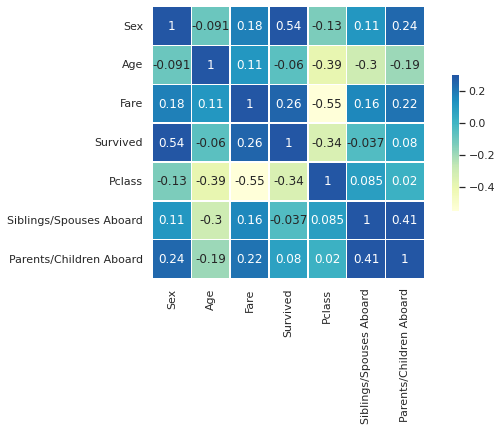

In [ ]:
#heatmap avec df_corr

#taille heatmap
plt.subplots(figsize=(10, 5))

#style
sns.set_theme(style="white")

#quand on a bcp de corrélation, c'est bien de faire une matrice que dans un sens
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# palette de couleur
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap
sns.heatmap(df_corr,                    # tableau de corrélation ci-dessus
                              # mask = matrice faite dans un seul sens
            cmap="YlGnBu",                  # palette de couleur
            vmax=.3,                    # Valeurs pour ancrer la palette de couleurs      
            center=0,                   # La valeur à laquelle centrer la palette de couleurs lors du traçage de données divergentes
            square=True,                # Si True, définissez l'aspect des axes sur « equal » afin que chaque cellule soit de forme carrée.
            linewidths=.5,              # Largeur des lignes qui diviseront chaque cellule
            annot=True,                 # afficher les valeurs           
            cbar_kws={"shrink": .5})    # Arguments de mot-clé pour matplotlib.figure.Figure.colorbar().


plt.show()

In [ ]:
# its more simple to analize coorelation with df

corr_survived = df_corr[['Survived']].sort_values(by='Survived', ascending=False)
corr_survived

,Survived
Survived,1.000000
Sex,0.542152
Fare,0.256177
Parents/Children Aboard,0.080097
Siblings/Spouses Aboard,-0.037082
Age,-0.059665
Pclass,-0.336528


In [ ]:
# GROUPBY Sex per age

age_mean = round(df_titanic.groupby(by=["Sex"]).mean('Age'),2)

#age_mean = age_mean.reset_index(drop=True)


age_mean['Survived'] = age_mean['Survived']*100
age_mean = age_mean.astype({'Survived': int})
age_mean = age_mean.astype({'Pclass': int})
age_mean.drop(columns=['Siblings/Spouses Aboard', 'Parents/Children Aboard'], inplace=True)



In [ ]:
#check df age_mean
age_mean

,Age,Fare,Survived,Pclass
Sex,,,,
0,30.41,25.63,19,2
1,27.71,44.48,74,2


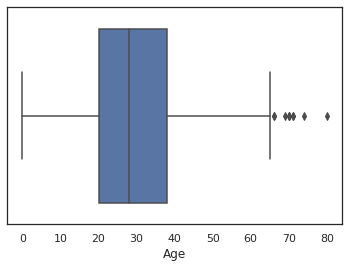

In [ ]:
# boxplot concernant l'âge des passagers
sns.boxplot(data=df_titanic, x='Age')


In [ ]:
fig=px.histogram(data_frame=df_titanic, 
            x='Pclass',
            color='Pclass',
            labels={'Pclass': 'Classe Passager'},
            color_discrete_sequence=px.colors.qualitative.Pastel,
            )

fig.update_layout(width=1000, height=600, title='Taux de survie par classe paasager', template='plotly_dark')
fig.show()


## You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?
df_Jack = df_titanic[(df_titanic['Name'].str.contains('Jack')) | (df_titanic['Name'].str.contains('jack'))]
df_Jack


,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
762,Dr. Arthur Jackson Brewe,0,46,39.6,0,1,0,0


In [ ]:
f"On the board we have {len(df_Jack)} person who is name Jack"

'On the board we have 1 person who is name Jack'

# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

## Train Test Split
  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select features (X) with only numeric values, and without "Survived" column
# Select "Survived" column as target (y)
var_corr = ["Sex", "Age", "Fare", "Pclass","Siblings/Spouses Aboard", "Parents/Children Aboard"]

X = df_titanic[var_corr] 
y = df_titanic['Survived'] 

#Split your data with random_state = 36
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)

#Train a logistic regression
newmodel = LogisticRegression().fit(X_train, y_train)

#Print the accuracy score on the train set and on the test set. Is there overfitting?
print(f"The accuracy score for training set: {round(newmodel.score(X_train, y_train),2)}")
print(f"The accuracy score  for test set: {round(newmodel.score(X_test, y_test),2)}")
print(f"we don't have overfitting")


# Print the Confusion Matrix on the test set (with max_iter)
newmodel2 = LogisticRegression(max_iter=100)
newmodel2.fit(X_test, y_test)
var = newmodel2.n_iter_

#How many iterations were needed to train this model?
f"we have need {var} iterations for train this model"

The accuracy score for training set: 0.82
The accuracy score  for test set: 0.79
we don't have overfitting


'we have need [83] iterations for train this model'

# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
df_titanic2 = df_titanic.copy()
df_titanic2.head()

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
0,Mr. Owen Harris Braund,0,22,7.25,0,3,1,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38,71.28,1,1,1,0
2,Miss. Laina Heikkinen,1,26,7.92,1,3,0,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35,53.10,1,1,1,0
4,Mr. William Henry Allen,0,35,8.05,0,3,0,0


In [ ]:
df_titanic2.loc[:,'Survived']

0      0
1      1
2      1
3      1
4      0
      ..
882    0
883    1
884    0
885    1
886    0
Name: Survived, Length: 887, dtype: int64

In [ ]:
var_corr = ['Pclass',	'Sex',	'Age','Siblings/Spouses Aboard', 'Parents/Children Aboard','Fare']

X = df_titanic2[var_corr] 
y = df_titanic2['Survived'] 


#Split your data with random_state = 36
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)


In [ ]:
#Fit the model on train set : 
model = LogisticRegression(class_weight={1:3, 0:1}).fit(X_train, y_train)

In [ ]:
# Print the accuracy score on the train set and on the test set

print(f"The accuracy score for training set: {round(model.score(X_train, y_train),2)}")
print(f"The accuracy score  for test set: {round(model.score(X_test, y_test),2)}")

The accuracy score for training set: 0.76
The accuracy score  for test set: 0.73


In [ ]:
# Perform prediction using the train dataset
survived_predict = model.predict(X_train)
survived_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
# Display the Confusion Matrix - Show the Confusion Matrix
confusion_matrix(y_train, survived_predict)

array([[294, 122],
       [ 40, 209]])

In [ ]:
# For check if I have the same number person of my predict
X_train.shape

(665, 6)

In [ ]:
#We can deduce from the confusion matrix that:

print(f"True positive: {confusion_matrix(y_train, survived_predict)[0][0]} (upper-left) – Number of survived we predicted correctly")
print(f"True negative: {confusion_matrix(y_train, survived_predict)[0][1]} (lower-right) – Number of dead we predicted correctly")
print(f"False positive: {confusion_matrix(y_train, survived_predict)[1][0]} (top-right) – Number of survived we predicted wrongly")
print(f"False negative: {confusion_matrix(y_train, survived_predict)[1][1]} (lower-left) – Number of dead we predicted wrongly")
print(f"I have {confusion_matrix(y_train, survived_predict)[0][0] + confusion_matrix(y_train, survived_predict)[0][1] + confusion_matrix(y_train, survived_predict)[1][0] + confusion_matrix(y_train, survived_predict)[1][1]} persons on my X-train with predict")

True positive: 294 (upper-left) – Number of survived we predicted correctly
True negative: 122 (lower-right) – Number of dead we predicted correctly
False positive: 40 (top-right) – Number of survived we predicted wrongly
False negative: 209 (lower-left) – Number of dead we predicted wrongly
I have 665 persons on my X-train with predict


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
# It's up to you:

# Perform prediction using the test dataset
survived_predict_test = model.predict(X_test)
survived_predict_test

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1])

In [ ]:
#add column in my test dataset
X_test['survived_predict'] = survived_predict_test

In [ ]:
X_test.sample(10)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived_predict
208,1,0,40,0,0,31.00,1
347,3,0,42,0,0,8.66,0
383,2,0,18,0,0,73.50,1
361,3,0,35,0,0,7.05,0
855,3,0,30,0,0,7.23,0
820,3,0,2,4,1,39.69,0
535,3,0,69,0,0,14.50,0
784,3,0,1,1,2,20.58,0
818,1,0,38,0,0,0.00,1
739,3,0,24,1,0,16.10,0


In [ ]:
# Display the Confusion Matrix - Show the Confusion Matrix
confusion_matrix(y_test, survived_predict_test)


array([[86, 43],
       [18, 75]])

In [ ]:
#We can deduce from the confusion matrix that:
print(f"True positive: {confusion_matrix(y_test, y_predict)[0][0]} (upper-left) – Number of survived we predicted correctly")
print(f"True negative: {confusion_matrix(y_test, y_predict)[0][1]} (lower-right) – Number of dead we predicted correctly")
print(f"False positive: {confusion_matrix(y_test, y_predict)[1][0]} (top-right) – Number of survived we predicted wrongly")
print(f"False negative: {confusion_matrix(y_test, y_predict)[1][1]} (lower-left) – Number of dead we predicted wrongly")
print(f"I have {confusion_matrix(y_test, y_predict)[0][0] + confusion_matrix(y_test, y_predict)[0][1] + confusion_matrix(y_test, y_predict)[1][0] + confusion_matrix(y_test, y_predict)[1][1]} persons on my X-test with predict")

True positive: 97 (upper-left) – Number of survived we predicted correctly
True negative: 32 (lower-right) – Number of dead we predicted correctly
False positive: 21 (top-right) – Number of survived we predicted wrongly
False negative: 72 (lower-left) – Number of dead we predicted wrongly
I have 222 persons on my X-test with predict


In [ ]:
Percent_survived = Survived_survived.value_counts(normalize=True)*100
Percent_survived.round(2)


Pclass  Sex  Age  Siblings/Spouses Aboard  Parents/Children Aboard  Fare    survived_predict
3       1    18   1                        0                        15.50   1                   1.69
             21   0                        0                        7.75    1                   1.69
2       0    23   0                        0                        13.00   1                   1.69
3       1    40   0                        2                        15.25   1                   0.85
2       0    18   0                        0                        11.50   1                   0.85
                                                                                                ... 
3       1    9    3                        2                        27.90   1                   0.85
                  4                        2                        31.28   1                   0.85
             12   3                        1                        25.47   1                   0.8

In [ ]:
Percent_PC_Class_survived = Survived_survived['Pclass'].value_counts(normalize=True)*100
Percent_PC_Class_survived.round(2)

3    37.29
1    32.20
2    30.51
Name: Pclass, dtype: float64

In [ ]:
Percent_gender_survived = Survived_survived['Sex'].value_counts(normalize=True)*100
Percent_gender_survived.round(2)

1    68.64
0    31.36
Name: Sex, dtype: float64

In [ ]:
Percent_age_survived = Survived_survived['Age'].value_counts(normalize=True)*100
Percent_age_survived.round(2)

18    9.32
22    5.93
24    4.24
40    4.24
27    4.24
28    4.24
19    4.24
23    4.24
35    3.39
30    3.39
25    2.54
42    2.54
26    2.54
29    2.54
17    2.54
36    2.54
50    1.69
21    1.69
1     1.69
2     1.69
31    1.69
16    1.69
13    1.69
38    1.69
9     1.69
5     0.85
6     0.85
4     0.85
8     0.85
15    0.85
14    0.85
12    0.85
60    0.85
56    0.85
32    0.85
55    0.85
54    0.85
52    0.85
51    0.85
49    0.85
48    0.85
47    0.85
45    0.85
44    0.85
43    0.85
41    0.85
39    0.85
37    0.85
34    0.85
33    0.85
0     0.85
Name: Age, dtype: float64

In [ ]:
Survived_survived.describe()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived_predict
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.0
mean,2.050847,0.686441,27.016949,0.457627,0.415254,41.690169,1.0
std,0.835612,0.465918,12.961470,0.812762,0.809413,66.286341,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,18.000000,0.000000,0.000000,10.672500,1.0
50%,2.000000,1.000000,25.500000,0.000000,0.000000,20.250000,1.0
75%,3.000000,1.000000,35.750000,1.000000,0.750000,36.937500,1.0
max,3.000000,1.000000,60.000000,4.000000,4.000000,512.330000,1.0


In [ ]:
# Which column is about "survived" probability?

# I keep only survived persons
Survived_survived = X_test[(X_test['survived_predict'] == 1)]

# This persons are most chances of survived

Survived_survived.loc[(Survived_survived['Pclass'] == 3) & (Survived_survived['Sex'] == 1) & (Survived_survived['Age'] == 18)]

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived_predict
674,3,1,18,0,0,9.84,1
782,3,1,18,0,0,7.50,1
699,3,1,18,0,1,14.45,1
240,3,1,18,1,0,15.50,1
803,3,1,18,0,0,7.78,1
651,3,1,18,0,0,6.75,1
609,3,1,18,1,0,15.50,1


In [ ]:
print(f"The person is about 'survived' probability is")

# I doing a max function for research they persons with most chances to survived
Survived_survived.mode()

The person is about 'survived' probability is


,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,survived_predict
0,3,1,18,0,0,13.0,1


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

#####Select the 120 people with the highest probability of dying. Of these, how many actually survived?
----------------------------------------
###Votre patron de voyage dans le temps vous dit qu'il y a une réduction de budget. Vous ne pouvez désormais sauver que 120 personnes max. Pas un de plus.

Si votre modèle prédit comme "mort" quelqu'un qui aurait survécu en réalité. Vous « sauvez » alors cette personne, qui aurait survécu même sans votre aide pour voyager dans le temps. Et vous prenez la place de quelqu'un qui aurait pu être sauvé. Ce n'est pas optimal.

Sélectionnez les 120 personnes les plus susceptibles de mourir. Parmi eux, combien ont réellement survécu ?

In [ ]:
df_titanic2.head()

,Name,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard
0,Mr. Owen Harris Braund,0,22,7.25,0,3,1,0
1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38,71.28,1,1,1,0
2,Miss. Laina Heikkinen,1,26,7.92,1,3,0,0
3,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35,53.10,1,1,1,0
4,Mr. William Henry Allen,0,35,8.05,0,3,0,0


In [ ]:
not_survived = model.predict(X)
not_survived

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
# add predict to my df titanic2
df_titanic2['not_survived_predict'] = not_survived

In [ ]:
# NSP = not survive predict
titanic_NSP = df_titanic2[(df_titanic2['not_survived_predict'] == 0)]

In [ ]:
titanic_NSP.describe()

,Sex,Age,Fare,Survived,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard,not_survived_predict
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0
mean,0.022831,30.739726,17.212374,0.132420,2.735160,0.561644,0.255708,0.0
std,0.149535,14.691825,20.663282,0.339335,0.572598,1.354572,0.682170,0.0
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,21.000000,7.780000,0.000000,3.000000,0.000000,0.000000,0.0
50%,0.000000,28.000000,8.050000,0.000000,3.000000,0.000000,0.000000,0.0
75%,0.000000,38.000000,20.240000,0.000000,3.000000,1.000000,0.000000,0.0
max,1.000000,80.000000,263.000000,1.000000,3.000000,8.000000,5.000000,0.0


In [ ]:
titanic_NSP = titanic_NSP.loc[(titanic_NSP['Pclass'] == 3) & (titanic_NSP['Sex'] == 0)]
titanic_NSP = titanic_NSP.iloc[:120,:]
titanic_NSP = titanic_NSP.reset_index(drop=True)
titanic_NSP.shape[0]

120

In [ ]:
wrong_predict = titanic_NSP[(titanic_NSP['Survived'] == 1)]
wrong_predict.shape[0]

18

In [ ]:
f"On {titanic_NSP.shape[0]} persons who are predict like died, {wrong_predict.shape[0]} persons did survive"

'On 120 persons who are predict like died, 18 persons did survive'

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?

-----------------------------------------------------

Le révérend « Rev. Juozas Montvila » a-t-il de meilleures chances de survie que « Mrs. William (Margaret Norton) Rice » ?

-Filtrez le DataFrame initial pour n'obtenir que les 2 lignes avec les 2 personnes ci-dessus, et uniquement les colonnes présentes dans vos variables (X)
-Faire une prédiction avec probabilité pour ces 2 personnes
-Lequel a une meilleure chance de survivre ?

In [ ]:
most_chance = df_titanic3[(df_titanic['Name'] == 'Rev. Juozas Montvila') | (df_titanic3['Name'] == 'Mrs. William (Margaret Norton) Rice')]
most_chance2= most_chance[['Pclass','Name','Sex' , 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

most_chance2

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
881,3,Mrs. William (Margaret Norton) Rice,1,39,0,5,29.12
882,2,Rev. Juozas Montvila,0,27,0,0,13.00


In [ ]:
var_corr = ["Sex", "Age", "Fare", "Pclass","Siblings/Spouses Aboard", "Parents/Children Aboard"]

X = df_titanic3[var_corr] 
y = df_titanic3['Survived'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)
model_training = model.fit(X_train, y_train)

model_training.predict(most_chance2[var_corr])

array([1, 1])

In [ ]:
f"The Two persons are same chance to survive"

'The Two persons are same chance to survive'